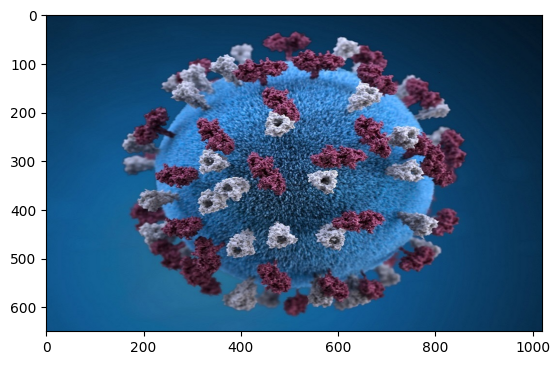

In [3]:
import matplotlib.pyplot as plt
from PIL import Image,ImageOps
img = Image.open('1.jpg')
plt.imshow(img)
plt.show()

Add Image

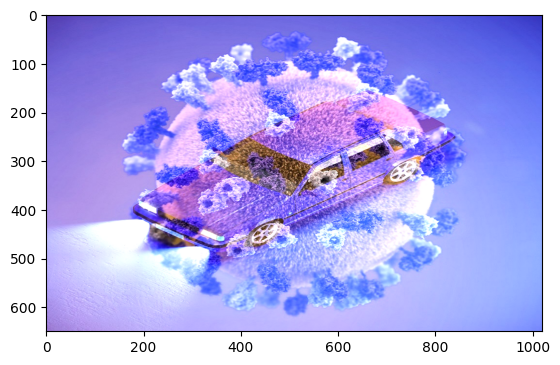

In [4]:
import cv2
import numpy as np
img1 = cv2.imread('1.jpg')
img2 = cv2.imread('2.jpg')

# Add the images
img1 = cv2.resize(img1, (img2.shape[1], img2.shape[0]))
result = cv2.add(img1, img2)

plt.imshow(result)



Subtract Image

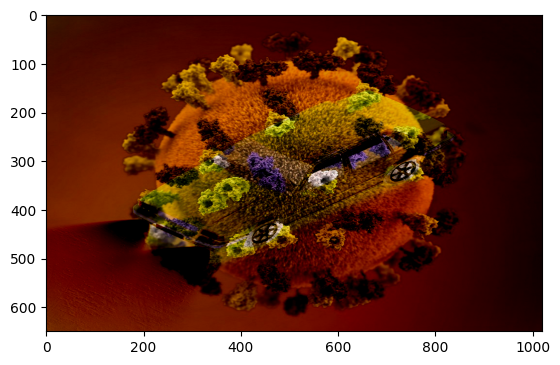

In [5]:
import cv2
import numpy as np
img1 = cv2.imread('1.jpg')
img2 = cv2.imread('2.jpg')
# Add the images
img1 = cv2.resize(img1, (img2.shape[1], img2.shape[0]))
result = cv2.subtract(img1, img2)
plt.imshow(result)
plt.show()

Histrogram

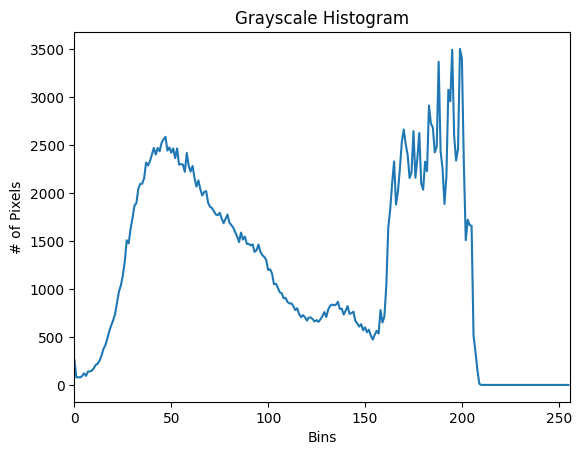

In [6]:
import cv2
import matplotlib.pyplot as plt

def show_histogram(image_path):
    # Load the image
    image = cv2.imread("nature.jpg", 0)  # Read the image in grayscale mode (0)

    # Calculate histogram
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])

    # Plot the histogram
    plt.figure()
    plt.title('Grayscale Histogram')
    plt.xlabel('Bins')
    plt.ylabel('# of Pixels')
    plt.plot(hist)
    plt.xlim([0, 256])
    plt.show()

# Provide the path to your image file
image_path = "path_to_your_image.jpg"

# Show the histogram
show_histogram(image_path)


Gray Convert

In [ ]:
import cv2
img= cv2.imread("1.jpg")
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.imshow("window",img_gray)
cv2.waitKey(0)

Convert Binary Image 

In [ ]:
import cv2

def convert_to_binary_image(image_path):
    # Load the image
    image = cv2.imread("1.jpg", 0)
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    return binary_image
image_path = "path_to_your_image.jpg"
binary_image = convert_to_binary_image(image_path)

# Display the original and binary images
cv2.imshow("Original Image", cv2.imread("1.jpg"))
cv2.imshow("Binary Image", binary_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Add Border

In [ ]:
import cv2
import numpy as np

def add_border(image_path, border_size, border_color):
    # Load the image
    image = cv2.imread("1.jpg")

    # Determine the dimensions of the new image with the border
    height, width = image.shape[:2]
    new_height = height + 2 * border_size
    new_width = width + 2 * border_size

    # Create a new image with the border
    border_image = np.zeros((new_height, new_width, 3), np.uint8)
    border_image[:, :] = border_color

    # Paste the original image in the center of the border image
    border_image[border_size:border_size + height, border_size:border_size + width] = image

    return border_image

# Provide the path to your image file
image_path = "path_to_your_image.jpg"

# Set the border size (in pixels) and the border color (BGR format)
border_size = 10
border_color = (0, 0, 255)  # Red border

# Add the border to the image
border_image = add_border(image_path, border_size, border_color)

# Display the original image and the image with the border
cv2.imshow("Original Image", cv2.imread("1.jpg"))
cv2.imshow("Image with Border", border_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Center Point Detect

In [ ]:
import cv2

def find_center_point(image):
    # Calculate the center coordinates
    height, width = image.shape[:2]
    center_x = int(width / 2)
    center_y = int(height / 2)

    return center_x, center_y

# Load the image
image_path = "path_to_your_image.jpg"
image = cv2.imread("1.jpg")

# Find the center point
center_x, center_y = find_center_point(image)

# Draw a circle at the center point
radius = 10
color = (0, 0, 255)  # Red color (BGR format)
thickness = -5  # Fill the circle
cv2.circle(image, (center_x, center_y), radius, color, thickness)

# Display the image with the center point
cv2.imshow("Image with Center Point", image)
cv2.waitKey(0)
cv2.destroyAllWindows()



Line,Edge,Point Detection

In [ ]:
import cv2
import numpy as np

def detect_lines(image_path):
    # Load the image
    image = cv2.imread("4.jpg")
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply probabilistic Hough Line Transform
    lines = cv2.HoughLinesP(gray, 1, np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)

    # Draw the lines on the image
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

    # Display the image with detected lines
    cv2.imshow("Lines", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


def detect_edges(image_path):
    # Load the image
    image = cv2.imread("4.jpg")

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(gray, threshold1=50, threshold2=150)

    # Display the image with detected edges
    cv2.imshow("Edges", edges)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


def detect_corners(image_path):
    # Load the image
    image = cv2.imread("4.jpg")

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect corners using the Harris corner detector
    gray = np.float32(gray)
    corners = cv2.cornerHarris(gray, 2, 3, 0.04)

    # Mark the corners on the image
    corners = cv2.dilate(corners, None)
    image[corners > 0.01 * corners.max()] = [0, 0, 255]

    # Display the image with detected corners
    cv2.imshow("Corners", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


# Provide the path to your image file
image_path = "path_to_your_image.jpg"

# Detect lines in the image
detect_lines(image_path)

# Detect edges in the image
detect_edges(image_path)

# Detect corners in the image
detect_corners(image_path)


Histrogram Equalization

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def histogram_equalization(image_path):
    # Load the image
    image = cv2.imread("5.jpg", 0)  # Read the image in grayscale mode (0)

    # Perform histogram equalization
    equalized_image = cv2.equalizeHist(image)

    # Calculate histograms
    hist_original = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

    # Plot the histograms
    plt.figure(figsize=(10, 5))

    plt.subplot(121)
    plt.plot(hist_original)
    plt.title('Original Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    plt.subplot(122)
    plt.plot(hist_equalized)
    plt.title('Equalized Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    return equalized_image

# Provide the path to your image file
image_path = "path_to_your_image.jpg"

# Perform histogram equalization and display histograms
equalized_image = histogram_equalization(image_path)

# Display the original and equalized images
cv2.imshow("Original Image", cv2.imread("5.jpg", 0))
cv2.imshow("Equalized Image", equalized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Morphological(D,R,O,C)

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread('opencv.png', 0)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original')

plt.show()


In [ ]:
kernel = np.ones((1,2), np.uint8)

In [ ]:
row, col = 2, 2
fig, axs = plt.subplots(row, col, figsize=(10, 5))
fig.tight_layout()


# erosion
erosion = cv2.erode(image, kernel, iterations = 1)
axs[0][0].imshow(cv2.cvtColor(erosion, cv2.COLOR_BGR2RGB))
axs[0][0].set_title('Erosion')
#cv2.imwrite('erosion.png', erosion)

# dialate
dilation = cv2.dilate(image, kernel, iterations = 1)
axs[0][1].imshow(cv2.cvtColor(dilation, cv2.COLOR_BGR2RGB))
axs[0][1].set_title('Dilation')
#cv2.imwrite('dilation.png', dilation)

# Opening 
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
axs[1][0].imshow(cv2.cvtColor(opening, cv2.COLOR_BGR2RGB))
axs[1][0].set_title('Opening')
#cv2.imwrite('opening.png', opening)

# Closing 
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
axs[1][1].imshow(cv2.cvtColor(closing, cv2.COLOR_BGR2RGB))
axs[1][1].set_title('Closing')
#cv2.imwrite('closing.png', closing)